In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import streamlit as st
import pickle

In [39]:
# Read the dataset
diab = pd.read_csv("/content/Healthcare-Diabetes.csv")

In [40]:
# Checking first few rows of the dataset
diab.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# Describing the dataset
diab.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [42]:
# Check for missing values
print("Missing values:\n", diab.isnull().sum())

Missing values:
 Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [43]:
# Check for Duplicates
print("Duplicates:\n", diab.duplicated().sum())

Duplicates:
 0


In [44]:
# Check for outliers using boxplots
num_columns = len(diab.select_dtypes(include=[np.number]).columns)
# Calculate number of rows needed
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

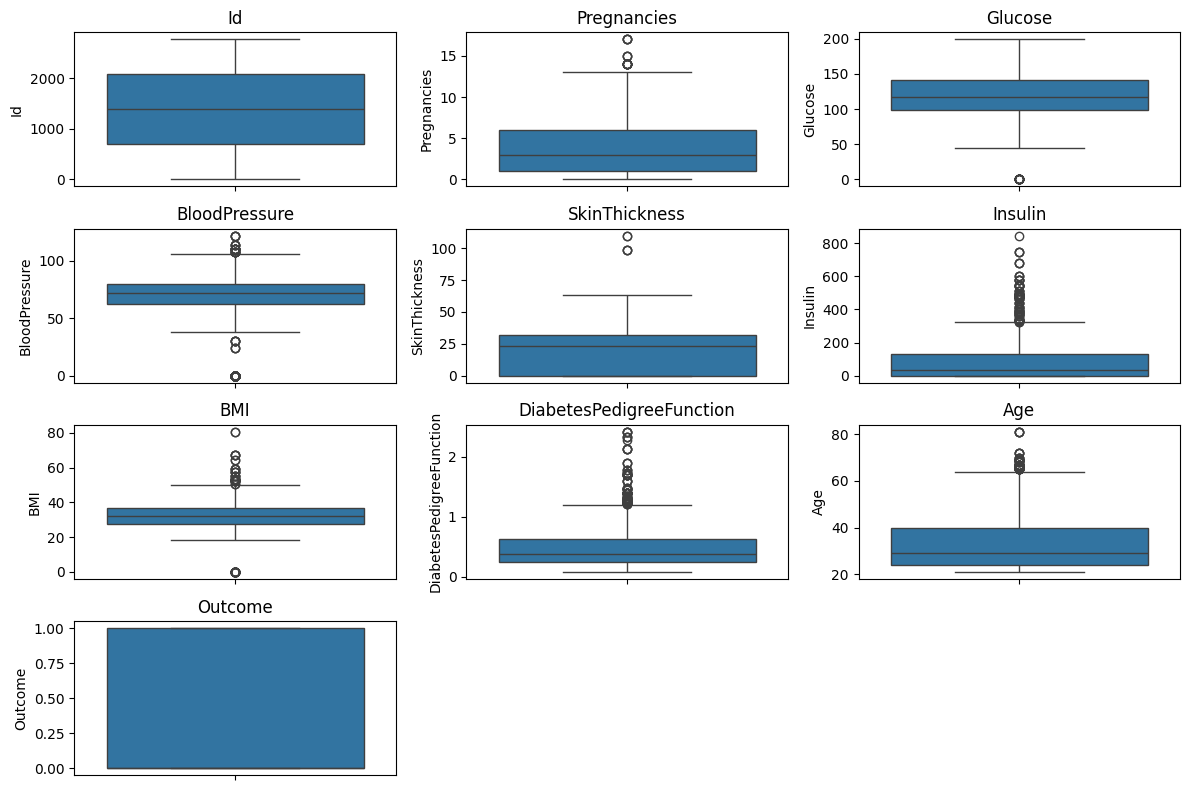

In [45]:
# Check for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(diab.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(diab[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [46]:
# Handle outliers
# For simplicity, we'll use the IQR method to cap outliers
for column in diab.select_dtypes(include=[np.number]).columns:
    Q1 = diab[column].quantile(0.25)
    Q3 = diab[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diab[column] = np.where(diab[column] < lower_bound, lower_bound, diab[column])
    diab[column] = np.where(diab[column] > upper_bound, upper_bound, diab[column])

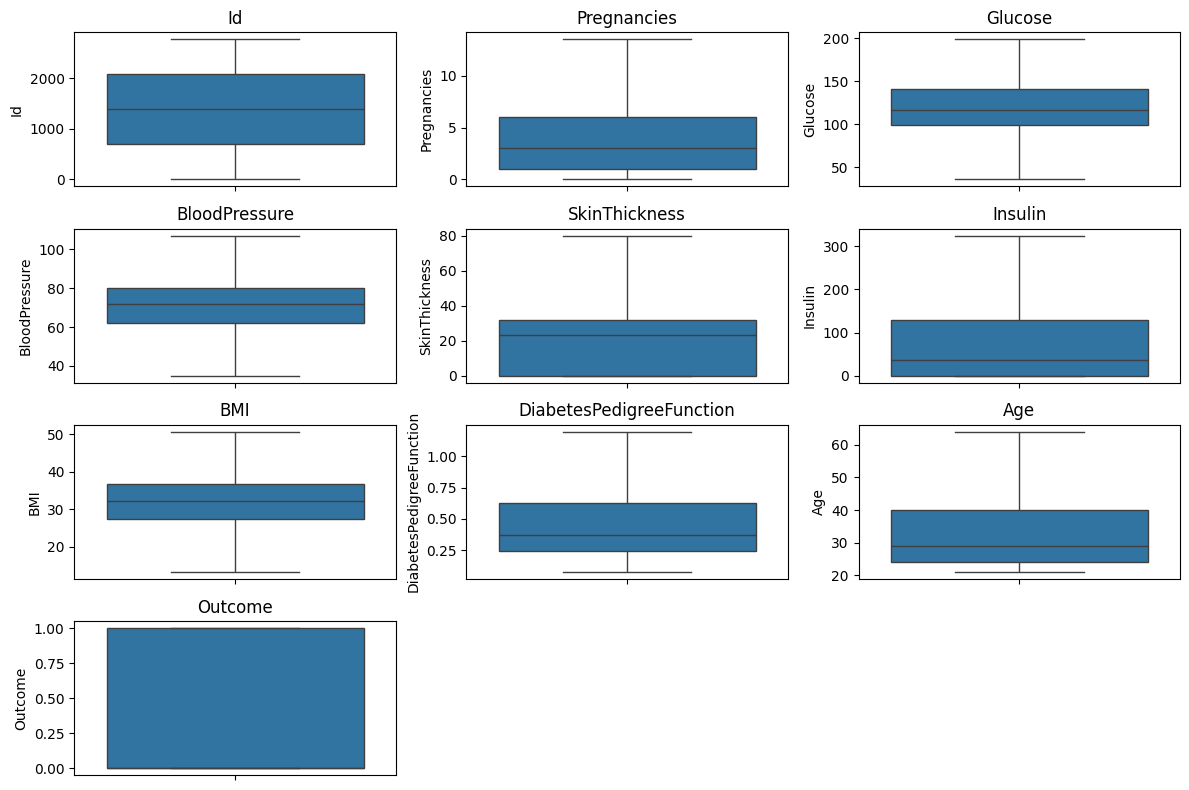

In [47]:
# Check for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(diab.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(diab[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [48]:
diab.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,2.0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,3.0,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,4.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,0.0,137.0,40.0,35.0,168.0,43.1,1.194,33.0,1.0


In [49]:
# Splitting into features and target
X = diab.drop('Outcome', axis=1)  # 'Outcome' is the target variable
y = diab['Outcome']

In [50]:
X.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,2.0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,3.0,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,4.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,5.0,0.0,137.0,40.0,35.0,168.0,43.1,1.194,33.0


In [31]:
y.head()

0    1.381146
1   -0.724037
2    1.381146
3   -0.724037
4    1.381146
Name: Outcome, dtype: float64

In [51]:
# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Select top 8 features (Removing the id column basically)
selector = SelectKBest(f_classif, k=8)
X_top = selector.fit_transform(X_scaled, y)

In [57]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

In [58]:
# Train the model using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Prediction accuracy: 98.19%
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9819494584837545
Confusion Matrix:
 [[364   3]
 [  7 180]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       367
         1.0       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



In [62]:
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(selector, open('selector.pkl', 'wb'))

In [64]:
#!pip install streamlit pyngrok

In [65]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

# Load the trained model and data processing objects
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
selector = pickle.load(open('selector.pkl', 'rb'))

st.title('Diabetes Risk Prediction')

def predict_diabetes(features):
    features_scaled = scaler.transform([features])
    features_selected = selector.transform(features_scaled)
    prediction = model.predict(features_selected)
    return prediction

st.sidebar.header('Input Features')
pregnancies = st.sidebar.number_input('Pregnancies', 0, 20, 0)
glucose = st.sidebar.number_input('Glucose', 0, 200, 0)
blood_pressure = st.sidebar.number_input('Blood Pressure', 0, 150, 0)
skin_thickness = st.sidebar.number_input('Skin Thickness', 0, 100, 0)
insulin = st.sidebar.number_input('Insulin', 0, 900, 0)
bmi = st.sidebar.number_input('BMI', 0.0, 70.0, 0.0)
dpf = st.sidebar.number_input('Diabetes Pedigree Function', 0.0, 2.5, 0.0)
age = st.sidebar.number_input('Age', 0, 120, 0)

features = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]

if st.sidebar.button('Predict'):
    prediction = predict_diabetes(features)
    if prediction == 1:
        st.write("You have a high risk of diabetes.")
    else:
        st.write("You have a low risk of diabetes.")

Writing app.py


In [68]:
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Start the Streamlit app
!streamlit run app.py &

# Create a new ngrok tunnel
public_url = ngrok.connect(port='8501')
print(f"Streamlit app running at: {public_url}")